Cell 1: Activation cell

In [1]:
import sys
from pathlib import Path
import os

# --- Resolve project root safely from a notebook ---
PROJECT_ROOT = Path(os.getcwd()).resolve()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

# Add project root to Python path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)

# --- Imports from src ---
from src.train import train_model

# --- Data directory ---
DATA_DIR = PROJECT_ROOT / "data" / "raw" / "EuroSAT_RGB"
print("Data dir:", DATA_DIR)

# --- Train model ---
model, class_names = train_model(
    data_dir=DATA_DIR,
    epochs=15
)

Project root: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model
Data dir: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\data\raw\EuroSAT_RGB
Using device: cpu


Epoch 1/15: 100%|██████████| 296/296 [02:12<00:00,  2.23it/s]


Epoch 1 | Train Loss: 1.0453 | Val Acc: 0.6763 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.6763)


Epoch 2/15: 100%|██████████| 296/296 [02:17<00:00,  2.15it/s]


Epoch 2 | Train Loss: 0.7616 | Val Acc: 0.7538 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.7538)


Epoch 3/15: 100%|██████████| 296/296 [02:57<00:00,  1.67it/s]


Epoch 3 | Train Loss: 0.6896 | Val Acc: 0.8323 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8323)


Epoch 4/15: 100%|██████████| 296/296 [03:00<00:00,  1.64it/s]


Epoch 4 | Train Loss: 0.6163 | Val Acc: 0.8412 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8412)


Epoch 5/15: 100%|██████████| 296/296 [02:36<00:00,  1.89it/s]


Epoch 5 | Train Loss: 0.5623 | Val Acc: 0.8410 | LR: 1.00e-03


Epoch 6/15: 100%|██████████| 296/296 [02:56<00:00,  1.68it/s]


Epoch 6 | Train Loss: 0.5125 | Val Acc: 0.8489 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8489)


Epoch 7/15: 100%|██████████| 296/296 [02:57<00:00,  1.67it/s]


Epoch 7 | Train Loss: 0.4764 | Val Acc: 0.8674 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8674)


Epoch 8/15: 100%|██████████| 296/296 [02:53<00:00,  1.70it/s]


Epoch 8 | Train Loss: 0.4515 | Val Acc: 0.8960 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.8960)


Epoch 9/15: 100%|██████████| 296/296 [06:17<00:00,  1.27s/it]


Epoch 9 | Train Loss: 0.4152 | Val Acc: 0.9077 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.9077)


Epoch 10/15: 100%|██████████| 296/296 [03:56<00:00,  1.25it/s]


Epoch 10 | Train Loss: 0.3829 | Val Acc: 0.8877 | LR: 1.00e-03


Epoch 11/15: 100%|██████████| 296/296 [03:01<00:00,  1.63it/s]


Epoch 11 | Train Loss: 0.3645 | Val Acc: 0.9052 | LR: 1.00e-03


Epoch 12/15: 100%|██████████| 296/296 [03:00<00:00,  1.64it/s]


Epoch 12 | Train Loss: 0.3362 | Val Acc: 0.9309 | LR: 1.00e-03
Saved BEST model so far to C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth (val_acc=0.9309)


Epoch 13/15: 100%|██████████| 296/296 [02:54<00:00,  1.70it/s]


Epoch 13 | Train Loss: 0.3178 | Val Acc: 0.9121 | LR: 1.00e-03


Epoch 14/15: 100%|██████████| 296/296 [02:52<00:00,  1.71it/s]


Epoch 14 | Train Loss: 0.3108 | Val Acc: 0.9049 | LR: 1.00e-03


Epoch 15/15: 100%|██████████| 296/296 [02:53<00:00,  1.71it/s]


Epoch 15 | Train Loss: 0.2916 | Val Acc: 0.8825 | LR: 1.00e-03
LR changed -> 5.00e-04
Done. Best Val Acc: 0.9309


Cell 2: Load saved model and run test evaluation

In [ ]:
import torch
from pathlib import Path

from src.dataset import load_eurosat_dataset
from src.models import build_model
from src.eval import evaluate_model

device = "cuda" if torch.cuda.is_available() else "cpu"

# repo root from notebook
PROJECT_ROOT = Path.cwd().resolve()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

MODEL_PATH = PROJECT_ROOT / "models" / "simple_cnn_v2_best.pth"
print("Loading weights from:", MODEL_PATH)

# Reload loaders (same splits as before if seed is same)
train_loader, val_loader, test_loader, class_names = load_eurosat_dataset(
    data_dir=DATA_DIR,
    img_size=64,
    batch_size=64,
    seed=42,
)

# Build model
model = build_model(num_classes=len(class_names)).to(device)

# Load weights with a helpful error if mismatch happens
state = torch.load(MODEL_PATH, map_location=device)
try:
    model.load_state_dict(state)
except RuntimeError as e:
    raise RuntimeError(
        f"State dict mismatch. Did you train with a different model version?\n"
        f"Model path: {MODEL_PATH}\n"
        f"Try retraining OR make sure models.py matches the checkpoint.\n\n"
        f"Original error:\n{e}"
    )

model.eval()

test_acc, cm, report = evaluate_model(model, test_loader, class_names, device)

print("Test Accuracy:", round(test_acc, 4))
print(report)

Loading weights from: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\models\simple_cnn_v2_best.pth
Test Accuracy: 0.9296
                      precision    recall  f1-score   support

          AnnualCrop     0.9172    0.9153    0.9162       472
              Forest     0.9837    0.9548    0.9690       442
HerbaceousVegetation     0.8840    0.9148    0.8991       458
             Highway     0.9590    0.8977    0.9273       391
          Industrial     0.9367    0.9788    0.9573       378
             Pasture     0.8571    0.9431    0.8981       299
       PermanentCrop     0.9033    0.8628    0.8826       379
         Residential     0.9865    0.9778    0.9821       450
               River     0.9132    0.8693    0.8907       375
             SeaLake     0.9406    0.9754    0.9577       406

            accuracy                         0.9296      4050
           macro avg     0.9281    0.9290    0.9280      4050
        weighted avg     0.9305    0.9296    0.9296      4050



Cell 3: Confusion matrix

Saved: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\reports\figures\confusion_matrix_v2_normalized.png


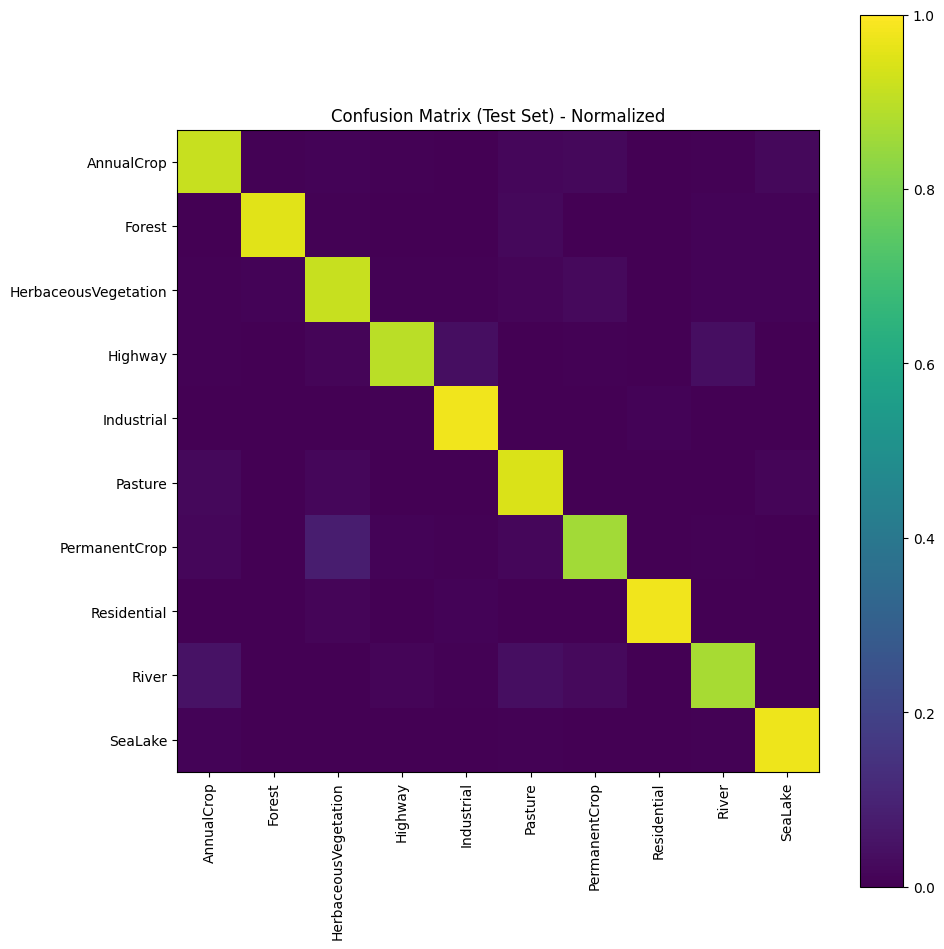

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

fig_dir = PROJECT_ROOT / "reports" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

cm_np = np.array(cm)

# Normalize rows (each true class sums to 1)
cm_norm = cm_np / np.maximum(cm_np.sum(axis=1, keepdims=True), 1)

plt.figure(figsize=(10, 10))
plt.imshow(cm_norm, vmin=0, vmax=1)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.title("Confusion Matrix (Test Set) - Normalized")
plt.colorbar()
plt.tight_layout()

out_path = fig_dir / "confusion_matrix_v2_normalized.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
print("Saved:", out_path)

plt.show()

Cell 4: Raw Confusion Matrix

Saved: C:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\reports\figures\confusion_matrix_v2_raw.png


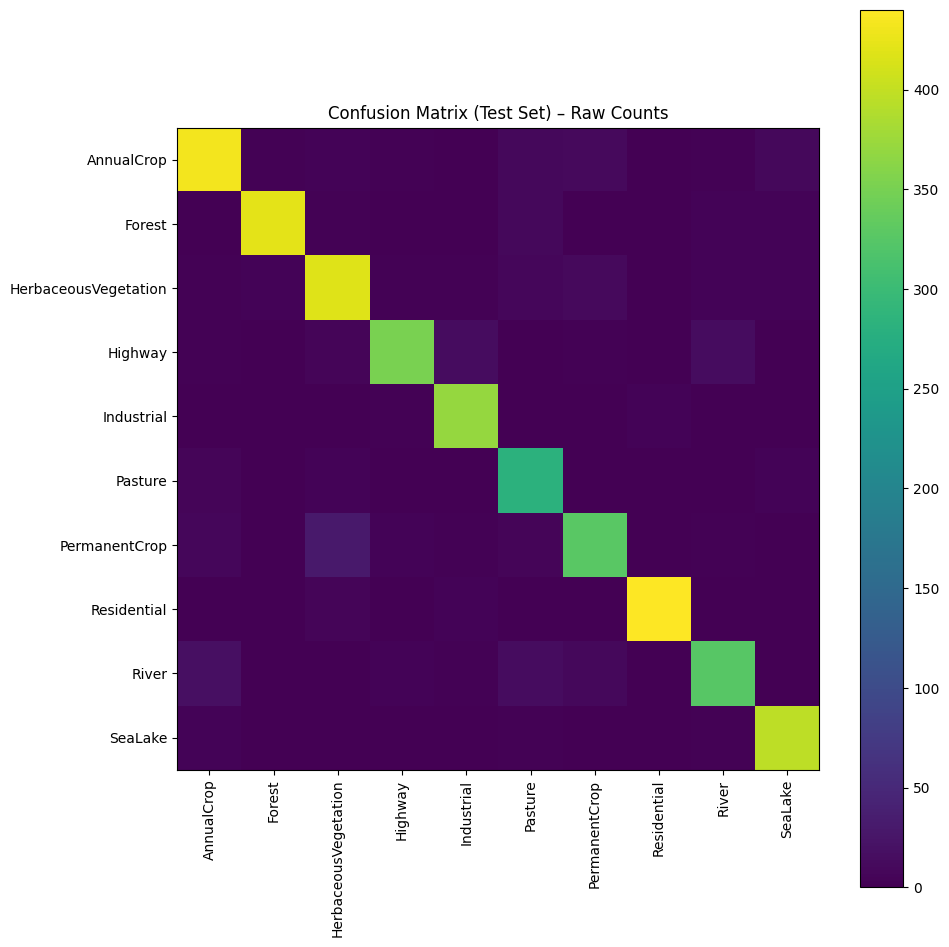

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

fig_dir = PROJECT_ROOT / "reports" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

cm_np = np.array(cm)

plt.figure(figsize=(10, 10))
plt.imshow(cm_np)
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.title("Confusion Matrix (Test Set) – Raw Counts")
plt.colorbar()
plt.tight_layout()

out_path = fig_dir / "confusion_matrix_v2_raw.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
print("Saved:", out_path)

plt.show()